### Przykładowe algorytmy do wyznaczania maksymalnego przepływu

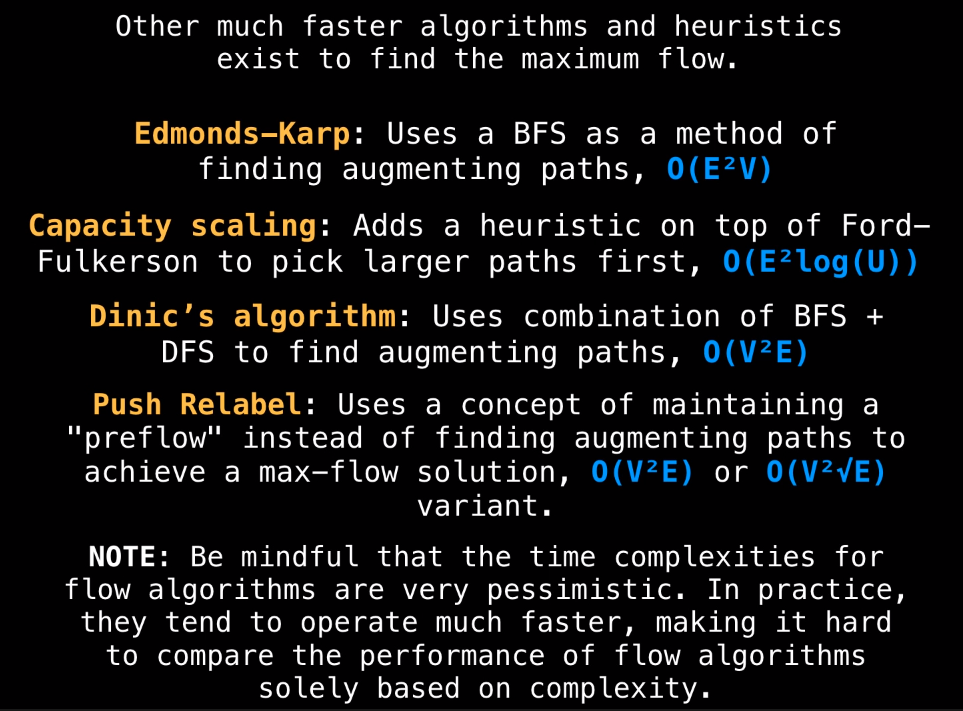

###### UWAGA
Poniżej przedstawione zostało wiele różnych implementacji. Jeżeli komuś zależy od razu na najlepszej implementacji, która jest najmniej skomplikowana, działa dla grafów skierowanych oraz nieskierowanych, nie modyfikuje grafu w miejscu i działa szybko (algorytm Edmondsa-Karpa), można od razu przejść do <a href="#best-ek">TEJ</a> implementacji (oraz następnej po niej, jeżeli na wejściu dostajemy graf w postaci list sąsiedztwa).

# Algorytmy dla grafów skierowanych

## Algorytm Forda-Fulkersona

### Omówienie

W skrócie idea jest taka, jak zostało to powiedziane w nagraniu "Sieć residualna i metoda Forda-Fulkersona". Chodzi o to, że w algorytmie w pętli, dopóki istnieją jakieś ścieżki powiększające w grafie (tj. skierowane ścieżki w grafie, który reprezentuje sieć residualną, prowadzące ze źródła do ujścia), możliwe jest powiększenie przepływu (jak sama nazwa mówi, dana ścieżka jest w stanie powiększyć przepływ) o wartość równą najmniejszej wadze krawędzi spośród wszystkich krawędzi, które znajdują się na ścieżce (oczywiście bierzemy wagi z grafu sieci residualnej, czyli pozostałe pojemności krawędzi, ponieważ już w krawędziach grafu wyjściowego może już coś płynąć) (taka krawędź nazywana jest wąskim gardłem - z ang. <i>bottleneck</i>). W zasadzie możemy o tym myśleć tak, że wycofujemy to, co płynęło już daną krawędzią i puszczamy przepływ w drugą stronę daną krawędzią (do tego nam służy sieć residualna), wtedy, gdy możliwe jest powiększenie przepływu po takiej operacji. W każdym kroku, po zwiększeniu wartości zapisanego przepływu w grafie, konieczne jest zaktualizowanie sieci residualnej, czyli np. modyfikacja wartości bieżącego przepływu w sieci dla każdej z krawędzi.

##### Link do implementacji, na której się wzorowałem:  https://iq.opengenus.org/ford-fulkerson-algorithm/

### Złożoność

###### Obliczeniowa
$ O((V + E) \cdot f^*) $ - bardzo wysoka złożoność obliczeniowa, która zależy od maksymalnej wartości przepływu w grafie (nie zawsze, to zależy od tego, w jakiej kolejności graf będzie przeglądany, ale w notacji dużego $ O $, zawsze rozważamy najgorszy przypadek). $ f^* $ - maksymalna wartość przepływu w sieci.
###### Pamięciowa
$ O(V^2) $ - ponieważ i tak zawsze tworzymy macierz o wymiarach $ V \times V $, aby móc w czasie $ O(1) $ pobierać informacje o bieżącym przepływie (wielkości przepływu, który przechodzi przez daną krawędź) oraz w takim samym czasie aktualizować przepływ dla tej krawędzi oraz krawędzi wstecznej (jakbyśmy chcieli wycofać jakiś przepływ).
##### UWAGA
Gdybyśmy mogli skorzystać ze słowników (hashmap), złożoność pamięciowa spadłaby do $ O(V + E) $ w obu przypadkach (bo w reprezentacji macierzowej traktujemy graf jako dany).

### Implementacja #1
##### (Dla macierzowej reprezentacji grafu)

###### UWAGA
W przypadku implementacji algorytmu Forda-Fulkersona dla macierzowej reprezentacji grafu, nie jest konieczne sprawdzanie, czy istnieje krawędź z $ u $ do $ v $, ponieważ, jeżeli nie istnieje, to zawsze $ flow[u][v] $ będzie wynosić $ 0 $, bo nigdy nie dodamy żadnego przepływu w tym miejscu, a więc również wynikiem tej operacji $ remaining = G[u][v] - flow[u][v] $ będzie $ 0 $, bo $ 0 - 0 = 0 $, więc wykryjemy to w poniższej instrukcji warunkowej $ remaining > 0 $. Co ciekwawe, takie podejście również pozwala nam na nie tworzenie żadnej sieci residualnej (osobnego grafu), ponieważ jeżeli w sieci residualnej istniałaby krawędź, którą możemy wycofać jakiś przepływ, wartość $ G[u][v] $ będzie równa $ 0 $ dla tej krawędzi, bo w grafie wyjściowym nie ma takiej krawędzi, ale o to nam chodzi, bo wówczas $ remaining = G[u][v] - flow[u][v] $ będzie miało wartość równą $ flow[v][u] $, czyli wartości przepływu, jaki możemy wycofać tą krawędzią (imitujemy tym samym istnienie krawędzi o odpowiedniej wadze).

##### Kod:

In [1]:
def ford_fulkerson(G: 'graph represented by adjacency matrix', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    def dfs(u, bottleneck):
        visited[u] = token
        
        if u == t: return bottleneck
        
        for v in range(n):
            remaining = G[u][v] - flow[u][v]
            if visited[v] != token and remaining > 0:
                new_bottleneck = dfs(v, min(remaining, bottleneck))
                if new_bottleneck:
                    flow[u][v] += new_bottleneck
                    flow[v][u] -= new_bottleneck
                    return new_bottleneck
        return 0
    
    while True:
        increase = dfs(s, inf)
        if not increase: break
        max_flow += increase
        token += 1
        
    return max_flow

###### Kika testów

##### Pomocnicze

In [2]:
def directed_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[0] * n for _ in range(n)]  # 0 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
    return G

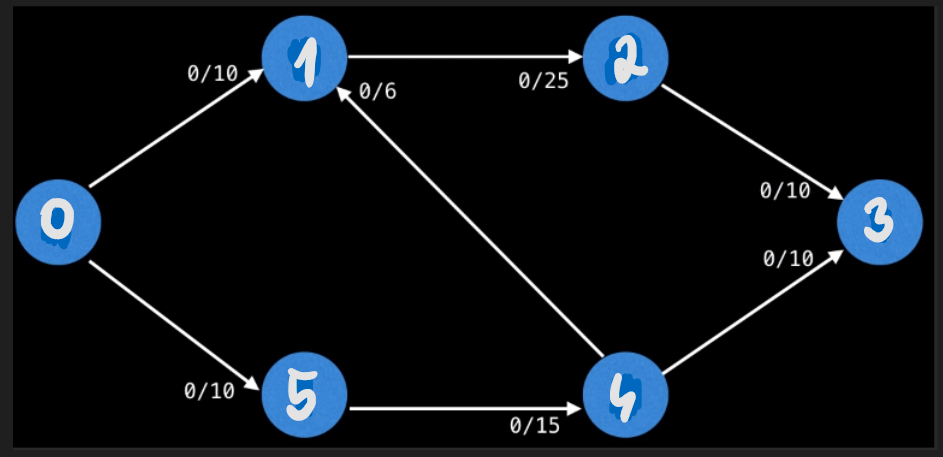

In [3]:
E = [(0, 1, 10), (1, 2, 25), (2, 3, 10), (0, 5, 10), (5, 4, 15), (4, 1, 6), (4, 3, 10)]
s = 0
t = 3

G = directed_weighted_graph_matrix(E)

print(ford_fulkerson(G, s, t))

20


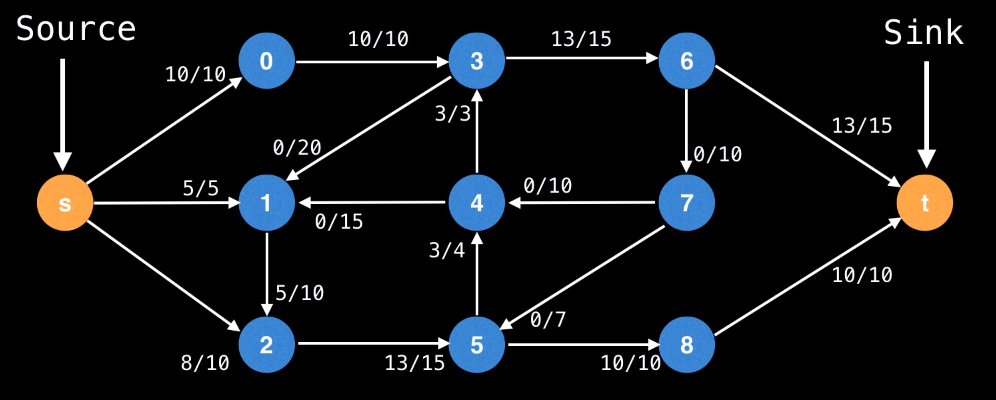

In [4]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = directed_weighted_graph_matrix(E)

print(ford_fulkerson(G, s, t))

23


### Implementacja #2
##### (Dla listowej reprezentacji grafu)

#### UWAGI:

Można by stworzyć na potrzeby algorytmu nowy graf, który posiada krawędzie w obie strony. Ja jednak zdecydowałem się na dodanie krawędzi do grafu, który otrzymujemy na wejściu, a następnie usunięcie dodanych krawędzi. Takie podejście można nieco ulepszyć, tworząc listy sąsiadów, przy pomocy list odsyłaczowych. Wówczas usunięcie dodanych wierzchołków odbywało by się w czasie $ O(V) $ zamiast $ O(V + E) $ (zamiast pojedynczego odczepiania każdgo z dodanych wierzchołków, moglibyśmy odpiąć całą dodaną listę w jednym kroku).

#### Kod:

In [5]:
def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v = G[u][i][0]
            G[v].append((u, 0))  # Add an edge with no weight
            
    return counts
    
    
def remove_back_edges(G, counts):
    n = len(G)
    
    for u in range(n):
        while len(G[u]) > counts[u]:
            G[u].pop()
    

def ford_fulkerson(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    counts = add_back_edges(G)
    
    def dfs(u, bottleneck):
        visited[u] = token
        
        if u == t: return bottleneck
        
        for v, capacity in G[u]:
            remaining = capacity - flow[u][v]
            if visited[v] != token and remaining > 0:
                new_bottleneck = dfs(v, min(remaining, bottleneck))
                if new_bottleneck:
                    flow[u][v] += new_bottleneck
                    flow[v][u] -= new_bottleneck
                    return new_bottleneck
        return 0
    
    while True:
        increase = dfs(s, inf)
        if not increase: break
        max_flow += increase
        token += 1
        
    remove_back_edges(G, counts)
        
    return max_flow

###### Kika testów

##### Pomocnicze

In [6]:
def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
    return G

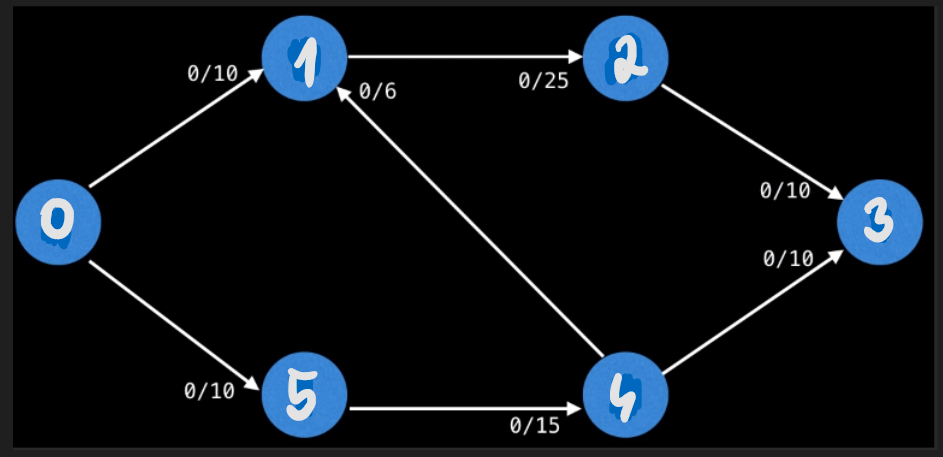

In [7]:
E = [(0, 1, 10), (1, 2, 25), (2, 3, 10), (0, 5, 10), (5, 4, 15), (4, 1, 6), (4, 3, 10)]
s = 0
t = 3

G = directed_weighted_graph_list(E)

print(ford_fulkerson(G, s, t))

20


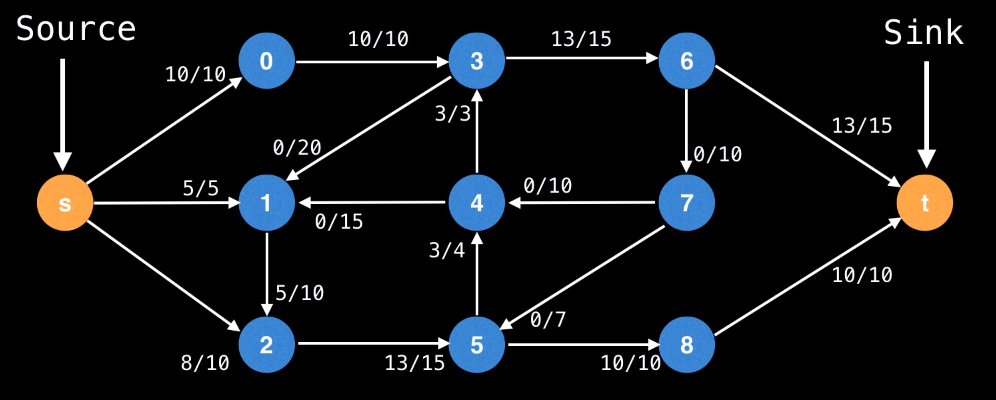

In [8]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = directed_weighted_graph_list(E)

print(ford_fulkerson(G, s, t))

23


## Algorytm Edmondsa-Karpa

### Omówienie

Ten algorytm jest prawdziwie wielomianowy względem liczby krawędzi oraz liczby wierzchołków w grafie. Mimo to, nie jest on demonem prędkości i istnieją szybsze algorytmy. Od przedstawionego wyżej algorytmu różni się głównie tym, że wybór ścieżek powiększających odbywa się w sposób bardziej inteligentny, co pozwala nam na szybsze zwiększanie wyznaczonego przepływu, niezależnie od wag krawędzi.
<br><br>
Tym razem zamiast algorytmu DFS, do poszukiwania ścieżek powiększających wykorzystamy algorytm BFS. W każdej iteracji algorytm znajduje najkrótszą ścieżkę (pod wzlgędem liczby krawędzi) ze źródła do ujścia. Tym samym mamy pewność, że nie będziemy przechodzić tymi samymi ścieżkami wielokrotnie. Poza tym, im dłuższa ścieżka, tym większa szansa na gorszy przepływ, więc szukanie najkrótszych ścieżek pozwala nam na wyznaczanie lepszych ścieżek powiększających.
###### Omówienie algorytmu ze szczegółami:
https://www.youtube.com/watch?v=RppuJYwlcI8

### Złożoność

###### UWAGA
Tak naprawdę, złożoność algorytmu Edmondsa-Karpa powinniśmy oszacować w nieco inny sposób. Przyjęło się, że podajemy złożoność $ O(VE^2) $, ponieważ nie zależy ona od wartości maksymalnego przepływu. Nie jest to jednak do końca prawidłowe oszacowanie, w przypadku gdy wartość maksymalnego przepływu jest niewielka. W takich sytuacjach, gdy np. każda krawędź ma wagę równą $ 1 $, otrzymalibyśmy złożoność algorytmu Forda-Fulkersona równą $ O((V + E) \cdot f^*) = | E = O(V^2), f^* = O(V) | = O(V^3) $, co oznaczałoby, że algorytm Forda-Fulkersona zadziała szybciej niż Edmondsa-Karpa. A dlaczego miałoby tak się stać, skoro algorytm Edmondsa-Karpa różni się jedynie tym, że wyznacza ścieżki powiększające, przy pomocy algorytmu BFS, a nie DFS, a więc z reguły szybciej, ale na pewno nie wolniej niż algorytm Forda-Fulkersona? Odpowiedź jest taka, że wówczas również otrzymamy złożoność równą $ O(V^3) $. Wynika to stąd, że nie powiedzieliśmy wcześniej, iż każdy algorytm, znajdujący maksymalny przepływ w grafie, który bazuje na metodzie Forda-Fulkersona, ma górne ograniczenie na złożoność obliczeniową równe $ O((V + E) \cdot f^*) $, więc tak naprawdę, to złożoność algorytmu Edmondsa-Karpa powinniśmy oszacować w taki sposób: $ O(min\{VE^2,  (V + E) \cdot f^*\}) $.
###### Obliczeniowa
$ O(VE^2) $ <br>
(Dokładniej to: $ O(min\{VE^2,  (V + E) \cdot f^*\}) $)
###### Pamięciowa
$ O(V^2) $ 

### Implementacja #1
##### (Dla macierzowej reprezentacji grafu)

In [9]:
from queue import Queue


def update_flow(flow, parents, bottleneck, t):
    u = t
    
    while parents[u] is not None:
        v = parents[u]
        flow[v][u] += bottleneck
        flow[u][v] -= bottleneck
        u = v


def edmonds_karp(G: 'graph represented by adjacency matrix', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    parents  = [None] * n
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    while True:
        bottleneck = inf
        q = Queue()
        q.put((s, bottleneck))
        visited[s] = token
        found_path = False
        
        while not q.empty():
            u, bottleneck = q.get()
            
            if u == t:
                update_flow(flow, parents, bottleneck, t)
                found_path = True
                break
            
            for v in range(n):
                remaining = G[u][v] - flow[u][v]
                if visited[v] != token and remaining > 0:
                    visited[v] = token
                    parents[v] = u
                    q.put((v, min(remaining, bottleneck)))
        
        if not found_path: break
        max_flow += bottleneck
        token += 1
        
    return max_flow

###### Kika testów

##### Pomocnicze

In [10]:
def directed_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[0] * n for _ in range(n)]  # 0 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
    return G

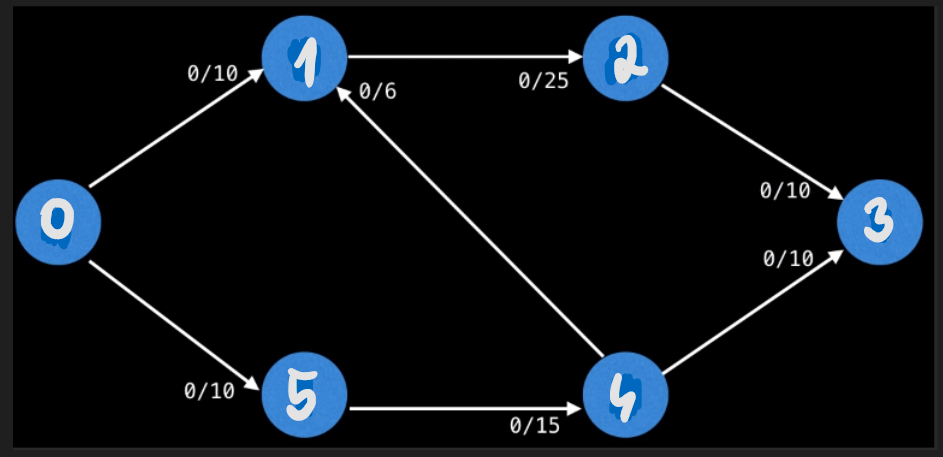

In [11]:
E = [(0, 1, 10), (1, 2, 25), (2, 3, 10), (0, 5, 10), (5, 4, 15), (4, 1, 6), (4, 3, 10)]
s = 0
t = 3

G = directed_weighted_graph_matrix(E)

print(edmonds_karp(G, s, t))

20


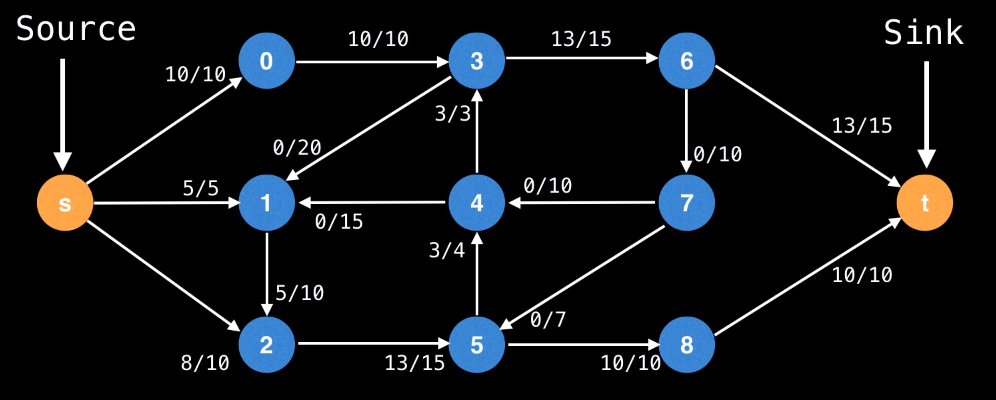

In [12]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = directed_weighted_graph_matrix(E)

print(edmonds_karp(G, s, t))

23


### Implementacja #2
##### (Dla listowej reprezentacji grafu)

In [13]:
from queue import Queue


def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v, _ = G[u][i]
            G[v].append((u, 0))  # Add an edge with no weight
            
    return counts
    
    
def remove_back_edges(G, counts):
    n = len(G)
    
    for u in range(n):
        while len(G[u]) > counts[u]:
            G[u].pop()


def update_flow(flow, parents, bottleneck, t):
    u = t
    
    while parents[u] is not None:
        v = parents[u]
        flow[v][u] += bottleneck
        flow[u][v] -= bottleneck
        u = v


def edmonds_karp(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    parents  = [None] * n
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    counts = add_back_edges(G)
    
    while True:
        bottleneck = inf
        q = Queue()
        q.put((s, bottleneck))
        visited[s] = token
        found_path = False
        
        while not q.empty():
            u, bottleneck = q.get()
            
            if u == t:
                update_flow(flow, parents, bottleneck, t)
                found_path = True
                break
            
            for v, capacity in G[u]:
                remaining = capacity - flow[u][v]
                if visited[v] != token and remaining > 0:
                    visited[v] = token
                    parents[v] = u
                    q.put((v, min(remaining, bottleneck)))
        
        if not found_path: break
        max_flow += bottleneck
        token += 1
        
    remove_back_edges(G, counts)
        
    return max_flow

###### Kika testów

##### Pomocnicze

In [14]:
def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
    return G

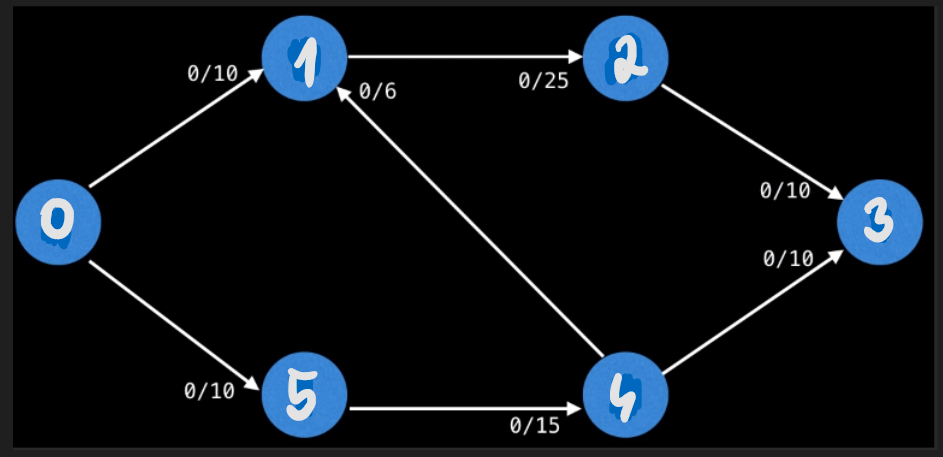

In [15]:
E = [(0, 1, 10), (1, 2, 25), (2, 3, 10), (0, 5, 10), (5, 4, 15), (4, 1, 6), (4, 3, 10)]
s = 0
t = 3

G = directed_weighted_graph_list(E)

print(edmonds_karp(G, s, t))

20


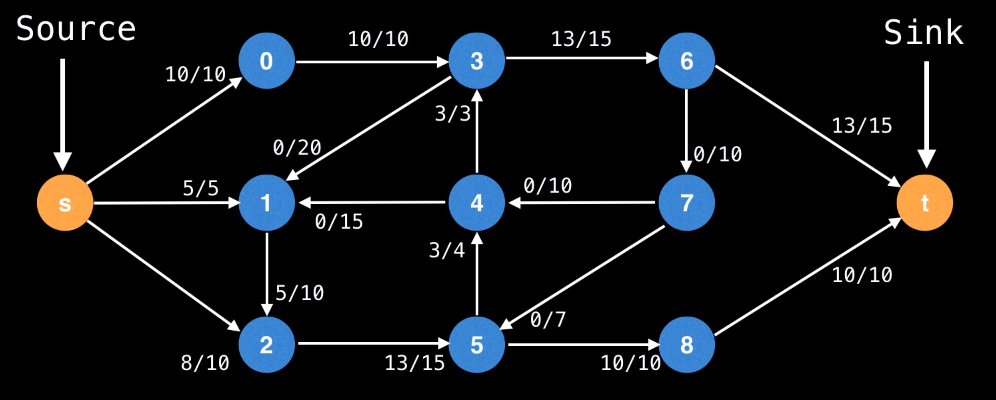

In [16]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = directed_weighted_graph_list(E)

print(*G,sep='\n')
print()
print(edmonds_karp(G, s, t))
print(*G,sep='\n')

[(3, 10)]
[(2, 10)]
[(5, 15)]
[(1, 20), (6, 15)]
[(3, 3), (1, 15)]
[(4, 4), (8, 10)]
[(7, 10), (10, 15)]
[(5, 7), (4, 10)]
[(10, 10)]
[(0, 10), (1, 5), (2, 10)]
[]

23
[(3, 10)]
[(2, 10)]
[(5, 15)]
[(1, 20), (6, 15)]
[(3, 3), (1, 15)]
[(4, 4), (8, 10)]
[(7, 10), (10, 15)]
[(5, 7), (4, 10)]
[(10, 10)]
[(0, 10), (1, 5), (2, 10)]
[]


# Algorytm Dinica

###### UWAGA
Ponieważ algorytm nie jest omawiany na ASD, nie zamieszczam jego implementacji.

### Omówienie

###### Omówienie algorytmu ze szczegółami
https://www.youtube.com/watch?v=M6cm8UeeziI <br>
https://iq.opengenus.org/dinics-algorithm/ (implementacja)

### Złożoność

###### Obliczeniowa
(Dokładniej to: $ O(min\{V^2E,  (V + E) \cdot f^*\}) $)
###### Pamięciowa
$ O(V^2) $

# Algorytmy dla grafów (nieskierowanych)
### (Albo ogólnie - dla wszystkich grafów, które nie są multigrafami)

###### UWAGA
Poniższe implementacje działają również dla grafów skierowanych. Działają nawet lepiej od powyższych, bo jeżeli w którymś z powyższych algorytmów graf na wejściu miałby cykl $ 2 $-elementowy, a więc krawędź skierowaną w dwie strony, pojawiłby się problem z utworzeniem sieci residualnej (opis problemu niżej). Zatem powyższe algoryty mają jedynie zastosowanie dla grafów, które mają maksymalnie jedną krawędź między daną parą wierzchołków $ u $ i $ v $.

## Gorsza wersja - z wykorzystaniem modyfikacji algorytmów dla grafów skierowanych

Problem dla grafów nieskierowanych rozwiązuje się bardzo podobnie jak poprzednio, lecz konieczne jest dodanie sztucznych wierzchołków (Tylko jeżeli chcemy skorzystać z modyfikacji któregoś z powyższych algorytmów. Istnieje jednak znacznie lepsze podejście, które zostało zaprezentowane później), które pozwolą na zadziałanie algorytmu w spośob prawidłowy. Głównym problemem jest to, że nie wiemy, w jaki sposób utworzyć graf, który reprezentuje sieć residualną. O ile poprzednio wystarczyło dodać krawędzie skierowane w przeciwnym kierunku, których wagi wynosiły 0 (z tego powodu, że waga krawędzi wsteczniej nie miała znaczenia; chcieliśmy tylko w łatwy spośob uzyskać możliwość wycofania przepływu, a ta linijka kodu:

    remaining = capacity - flow[u][v]

wymagała tego, aby pojemność krawędzi wstecznej ($ capacity $) wynosiła 0. Jest to spowodowane tym, że jeżeli z wierzchołka $ u $ do $ v $ płynęła pewna ilość wody/informacji/etc., to w grafie residualnym, waga krawędzi z $ v $ do $ u $ powinna wynosić tyle, ile wynosi przepływ z $ u $ do $ v $, natomiast waga krawędzi z $ u $ do $ v $ powinna być równa pozostałej pojemności krawędzi. Aby niepotrzebnie nie bawić się w modyfikacje grafu i w łatwy sposób pozyskać wagę krawędzi w grafie residualnym, używaliśmy powyższej linijki kodu, dla której rezultatem dla krawędzi $ u - v $ (skierowanej zgodnie z kierunkiem przepływu) była zawsze wartość pozostałej pojemności krawędzi (pojemność pomniejszona o to, co już płynie), a dla krawędzi wstecznej zawsze otrzymujemy wówczas $ remaining = 0 - flow[u][v] $ (jeżeli $ u - v $ jest krawędzią wsteczną), ponieważ dla krawędzi wstecznych trzymamy ujemny przepływ (tzn. jeżeli krawędź z $ u $ do $ v $ wskazuje kierunek przepływu o wartości $ flow[u][v] $, to krawędź do niej przeciwna ma wartość $ flow[v][u] = -flow[u][v] $). <br><br>
W skrócie - w takiej implementacji algorytmu w łatwy sposób mogliśmy utworzyć graf sieci residualnej, poprzez dodanie jedynie krawędzi wstecznych o wagach 0, a następnie ich usunięcie (pracowaliśmy na grafie, który otrzymaliśmy na wejściu, tymczasowo go modyfikując). W przypadku grafów nieskierowanych, niestety mamy od razu dane krawędzie skierowane w obie strony. Jeżeli chcielibyśmy, jak wcześniej, dodać krawędź skierowaną przeciwnie o wadze 0 dla każdej krawędzi grafu, orztymalibyśmy po 4 krawędzie między każdą parą połączonych w grafie wyjściowym krawędzią wierzchołków. Nie mozemy tak postąpić, bo algorytm nie będzie wiedział, jak ma się zachować. Rozwiązaniem jest rozdzielenie jednej krawędzi na 2 i połączenie jej ze sztucznie dodanym wierzchołkiem. Musimy przy tym zapisać nowym krawędziom te same wagi, jakie miała rozdzielana krawędź. Krawędź będzie połączona ze sztucznym wierzchołkiem, z którym nie będzie połączona żadna inna krawędź poza tymi dwiema, które otrzymaliśmy po rozdzieleniu poprzedniej krawędzi. Spójrzmy na rysunek:
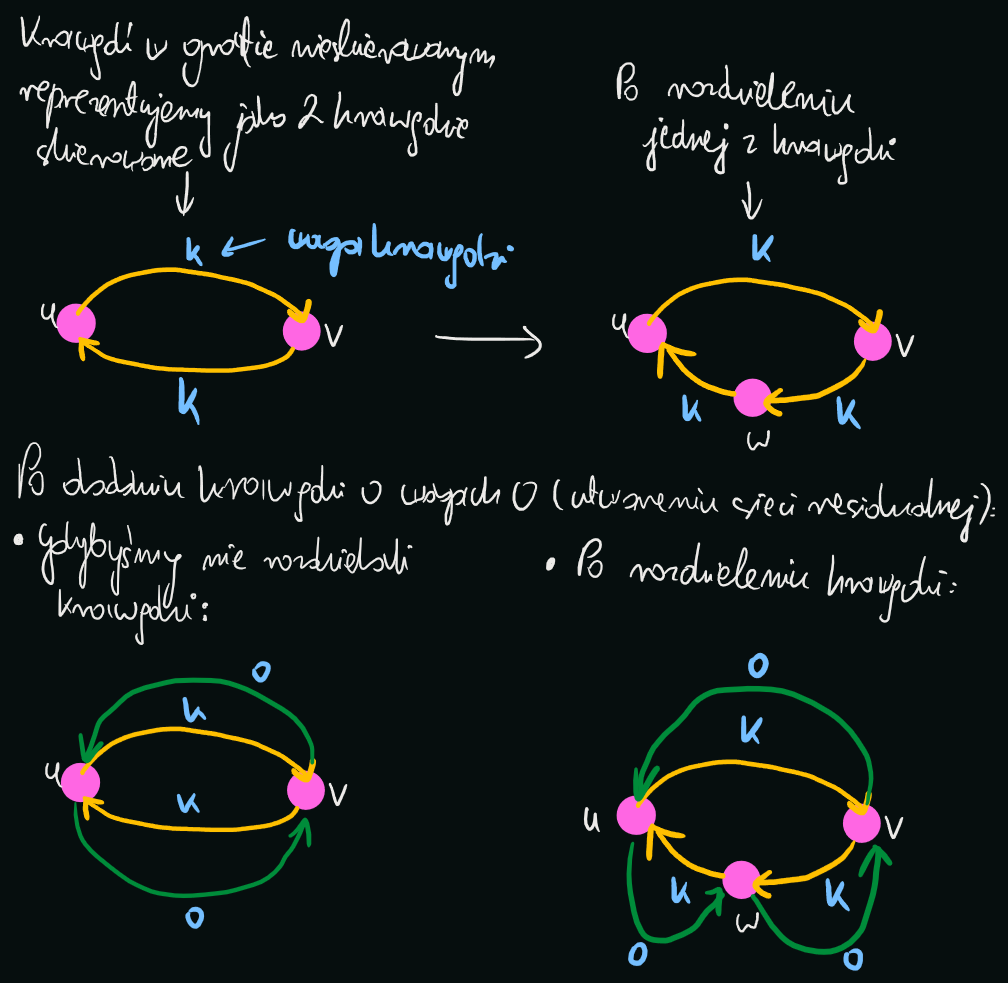
###### UWAGA
Ponieważ w grafie nieskierowanym w reprezentacji listowej trudno jest w szybkim czasie sprawdzić to, czy już rozdzieliliśmy jedną z dwóch krawędzi między parą wierzchołków $ u $ i $ v $, możemy po prostu rozdzielić każdą z krawędzi na 2, tworząc z grafu nieskierowanego, graf skierowany.
<br><br>
Istnieje jednak jeden inny sprytny sposób. Wystarczy wstawiać dodatkowy wierzchołek tylko wtedy, gdy dla krawędzi $ u - v $, $ u > v $ (lub $ u < v $, ale musimy konsekwentnie zawsze korzystać z tej samej nierówności). W ten sposób, jeżeli graf jest nieskierowany, rozdzielimy tylko jedną krawędź, bo dla każdej krawędzi $ u - v $ istnieje krawędź przeciwna, a $ u \neq v $, bo graf nie ma pętli ani krawędzi wielokrotnych (takimi grafami zwykle się nie zajmujemy). Jeżeli jednak graf jest skierowany (może mieć część krawędzi w obie strony - po 2 krawędzie miedzy wierzchołkami, ale nie musi), nie robi to również problemu, bo wtedy, jeżeli istnieje tylko jedna krawędź między parą wierzchołków, to jeżeli ją rozdzielimy, to nic się nie stanie (nie zmienia się nasza przepustowość sieci).

## Algorytm Forda-Fulkersona

### Implementacja #1
##### (Dla macierzowej reprezentacji grafu)

Ponieważ dodawanie wierzchołków do grafu w reprezentacji macierzowej wiązałoby się z dodaniem całych wierszy wypełnionych zerami oraz zerowych kolumn (bo dodawane wierzchołki zawsze mają tylko jedną krawędź wychodzącą i jedną wchodzącą), otrzymalibyśmy w efekcie graf rzadki, więc dużo lepszym rozwiązaniem dla grafów rzadkich jest utworzenie nowego grafu z tej macierzy, z uwzględnieniem sztucznie dodanych wierzchołków.

Poniższy kod jest tak naprawdę nieco zmodyfikowaną wersją algorytmu dla reprezentacji listowej grafów skierowanych. Konieczne jest jedynie utworzenie odpowiedniego grafu na podstawie macierzy, którą otrzymujemy na wejściu. nie musimy również naprawiać grafu po dodaniu krawędzi wstecznych o wagach $ 0 $, ponieważ jest to jedynie graf pomocniczny, a nie graf wyjściowy, którego nie modyfikujemy.

##### Kod:

In [17]:
def map_graph(G: 'graph represented by adjacency matrix'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    w = n
        
    for u in range(n):
        for v in range(n):
            if G[u][v]:
                if u < v:
                    G2.append([])
                    G2[u].append((w, G[u][v]))
                    G2[w].append((v, G[u][v]))
                    w += 1
                else:
                    G2[u].append((v, G[u][v]))
                    
    return G2
    

def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v, _ = G[u][i]
            G[v].append((u, 0))  # Add an edge with no weight
    

def ford_fulkerson(G: 'graph represented by adjacency matrix', s: 'source vertex', t: 'target vertex'):
    # Create a directed graph from the input graph
    G = map_graph(G)
    
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    add_back_edges(G)
    
    def dfs(u, bottleneck):
        visited[u] = token
        
        if u == t: return bottleneck
        
        for v, capacity in G[u]:
            remaining = capacity - flow[u][v]
            if visited[v] != token and remaining > 0:
                new_bottleneck = dfs(v, min(remaining, bottleneck))
                if new_bottleneck:
                    flow[u][v] += new_bottleneck
                    flow[v][u] -= new_bottleneck
                    return new_bottleneck
        return 0
    
    while True:
        increase = dfs(s, inf)
        if not increase: break
        max_flow += increase
        token += 1
        
    return max_flow

###### Kika testów

##### Pomocnicze

In [18]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[0] * n for _ in range(n)]  # 0 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G

###### UWAGA:
Wykorzystałem tę samą ilustrację grafu, ale w testach niżej graf jest nieskierowany.
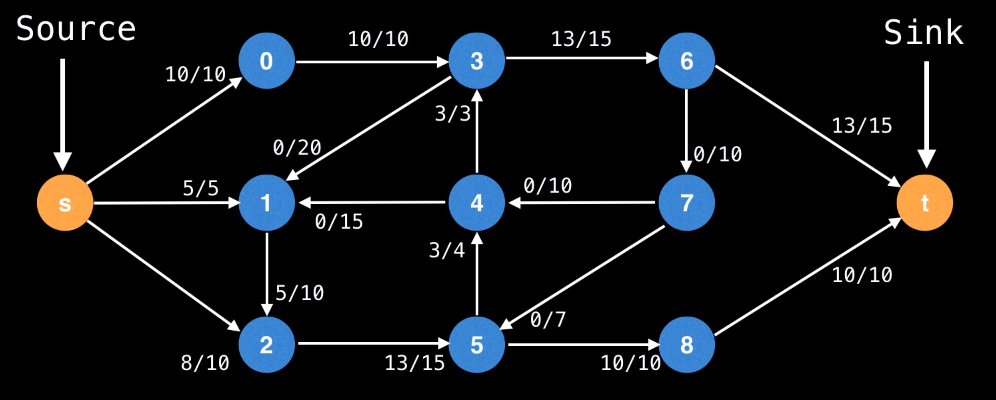

In [19]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = undirected_weighted_graph_matrix(E)

print(ford_fulkerson(G, s, t))

25


### Implementacja #2
##### (Dla listowej reprezentacji grafu)

Tym razem algorytm jest bardzo podobny do powyższego. Konieczne jest również stworzenie nowego grafu, bo tamtego łatwo nie zmodyfikujemy w miejscu (usuwanie wierzchołków z listy sąsiedztwa, w celu usunięcia krawędzi i wstawienia w jej miejsce krawędzi do sztucznego wierzchołka nie jest zbyt szybkie, chyba że listy sąsiedztwa byłyby zapisane jako listy odsyłaczowe, ale jest to niewygodne).

In [20]:
""" Drobne zmiany w poniższej funkcji (to są jedynie zmiany względem powyższego algorytmu) """
def map_graph(G: 'graph represented by adjacency lists'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    w = n
        
    for u in range(n):
        for v, weight in G[u]:
            if u < v:
                G2.append([])
                G2[u].append((w, weight))
                G2[w].append((v, weight))
                w += 1
            else:
                G2[u].append((v, weight))
                    
    return G2
""" Koniec zmian """
    

def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v = G[u][i][0]
            G[v].append((u, 0))  # Add an edge with no weight
    

def ford_fulkerson(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    # Create a directed graph from the input graph
    G = map_graph(G)
    
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    add_back_edges(G)
    
    def dfs(u, bottleneck):
        visited[u] = token
        
        if u == t: return bottleneck
        
        for v, capacity in G[u]:
            remaining = capacity - flow[u][v]
            if visited[v] != token and remaining > 0:
                new_bottleneck = dfs(v, min(remaining, bottleneck))
                if new_bottleneck:
                    flow[u][v] += new_bottleneck
                    flow[v][u] -= new_bottleneck
                    return new_bottleneck
        return 0
    
    while True:
        increase = dfs(s, inf)
        if not increase: break
        max_flow += increase
        token += 1
        
    return max_flow

###### Kika testów

##### Pomocnicze

In [21]:
def undirected_weighted_graph_lists(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

###### UWAGA:
Wykorzystałem tę samą ilustrację grafu, ale w testach niżej graf jest nieskierowany.
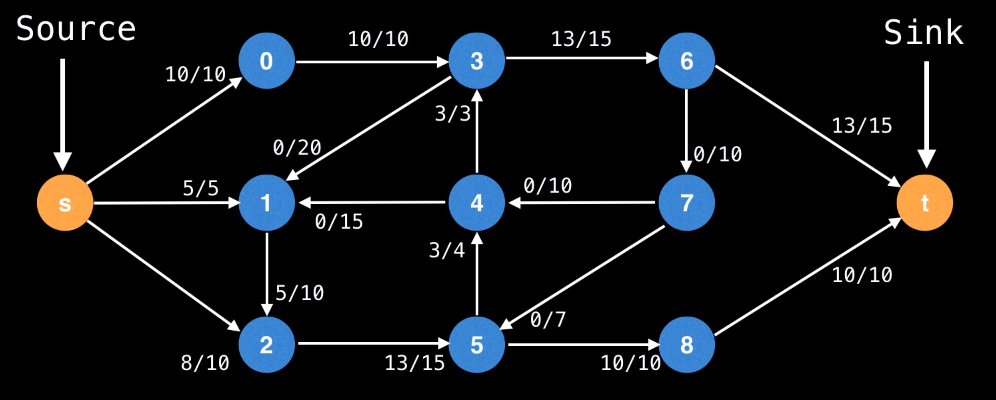

In [22]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = undirected_weighted_graph_lists(E)

print(ford_fulkerson(G, s, t))

25


## Algorytm Edmondsa-Karpa

Analogicznie jak wyżej, jedynie modyfikujemy graf, jaki przekazujemy na wejściu funkcji, znajdującej maksymalny przepływ.

### Implementacja #1
##### (Dla macierzowej reprezentacji grafu)

In [23]:
from queue import Queue


def map_graph(G: 'graph represented by adjacency matrix'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    w = n
    
    for u in range(n):
        for v in range(n):
            if G[u][v]:
                if u < v:
                    G2.append([])
                    G2[u].append((w, G[u][v]))
                    G2[w].append((v, G[u][v]))
                    w += 1
                else:
                    G2[u].append((v, G[u][v]))
                    
    return G2


def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v, _ = G[u][i]
            G[v].append((u, 0))  # Add an edge with no weight

            
def update_flow(flow, parents, bottleneck, t):
    u = t
    
    while parents[u] is not None:
        v = parents[u]
        flow[v][u] += bottleneck
        flow[u][v] -= bottleneck
        u = v


def edmonds_karp(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    G = map_graph(G)
    
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    parents  = [None] * n
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    add_back_edges(G)
    
    while True:
        bottleneck = inf
        q = Queue()
        q.put((s, bottleneck))
        visited[s] = token
        found_path = False
        
        while not q.empty():
            u, bottleneck = q.get()
            
            if u == t:
                update_flow(flow, parents, bottleneck, t)
                found_path = True
                break
            
            for v, capacity in G[u]:
                remaining = capacity - flow[u][v]
                if visited[v] != token and remaining > 0:
                    visited[v] = token
                    parents[v] = u
                    q.put((v, min(remaining, bottleneck)))
        
        if not found_path: break
        max_flow += bottleneck
        token += 1
        
    return max_flow

###### Kilka testów

###### UWAGA:
Wykorzystałem tę samą ilustrację grafu, ale w testach niżej graf jest nieskierowany.
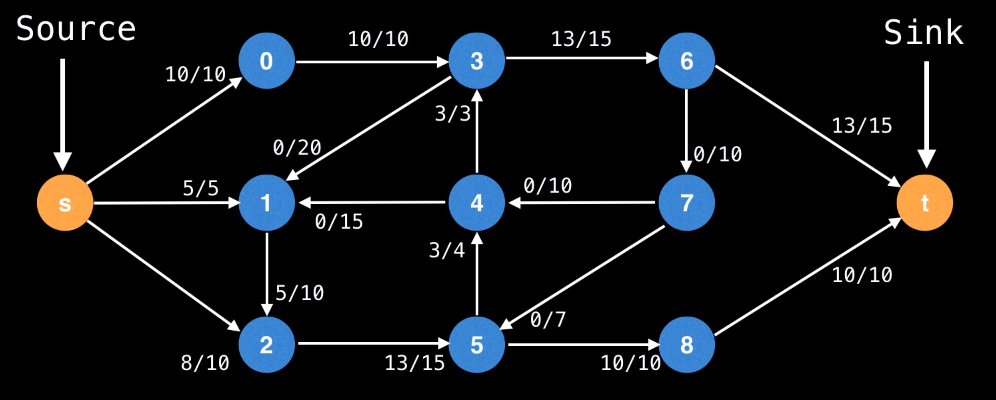

In [24]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = undirected_weighted_graph_matrix(E)

print(edmonds_karp(G, s, t))

25


### Implementacja #2
##### (Dla listowej reprezentacji grafu)

In [25]:
from queue import Queue


""" Drobne zmiany w poniższej funkcji (to są jedynie zmiany względem powyższego algorytmu) """
def map_graph(G: 'graph represented by adjacency lists'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    w = n
        
    for u in range(n):
        for v, weight in G[u]:
            if u < v:
                G2.append([])
                G2[u].append((w, weight))
                G2[w].append((v, weight))
                w += 1
            else:
                G2[u].append((v, weight))
                    
    return G2
""" Koniec zmian """


def add_back_edges(G):
    n = len(G)
    counts = [0] * n  # Numbers of edges in an initial graph (before modification)
    
    for u in range(n):
        counts[u] = len(G[u])
        
    for u in range(n):
        for i in range(counts[u]):
            v, _ = G[u][i]
            G[v].append((u, 0))  # Add an edge with no weight

            
def update_flow(flow, parents, bottleneck, t):
    u = t
    
    while parents[u] is not None:
        v = parents[u]
        flow[v][u] += bottleneck
        flow[u][v] -= bottleneck
        u = v


def edmonds_karp(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    G = map_graph(G)
    
    n = len(G)
    inf = float('inf')
    flow     = [[0] * n for _ in range(n)]
    parents  = [None] * n
    visited  = [0] * n
    token    = 1  # Number of iteration to check which vertices have been visited
    max_flow = 0
    
    add_back_edges(G)
    
    while True:
        bottleneck = inf
        q = Queue()
        q.put((s, bottleneck))
        visited[s] = token
        found_path = False
        
        while not q.empty():
            u, bottleneck = q.get()
            
            if u == t:
                update_flow(flow, parents, bottleneck, t)
                found_path = True
                break
            
            for v, capacity in G[u]:
                remaining = capacity - flow[u][v]
                if visited[v] != token and remaining > 0:
                    visited[v] = token
                    parents[v] = u
                    q.put((v, min(remaining, bottleneck)))
        
        if not found_path: break
        max_flow += bottleneck
        token += 1
        
    return max_flow

###### Kilka testów

###### UWAGA:
Wykorzystałem tę samą ilustrację grafu, ale w testach niżej graf jest nieskierowany.
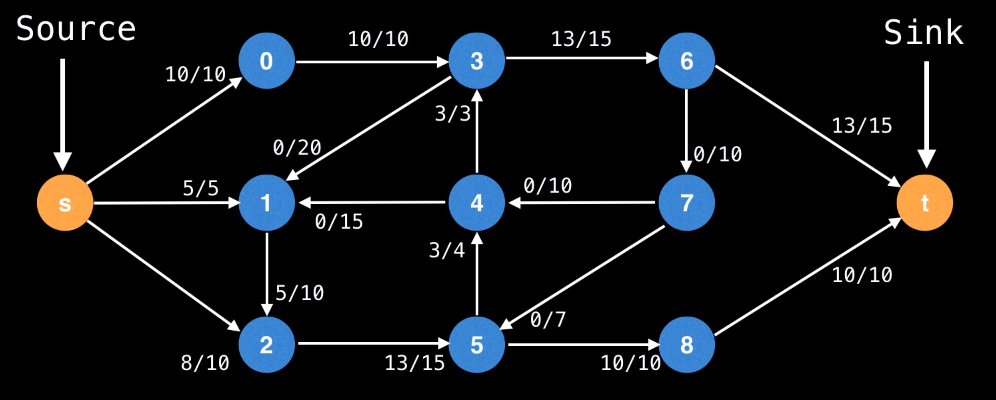

In [26]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = undirected_weighted_graph_lists(E)

print(edmonds_karp(G, s, t))

25


## Lepsza wersja - bez konieczności modyfikowania grafu <span id="best-ek"></span>

###### UWAGA
We wcześniejszych implementacjach korzystaliśmy z tablicy $ flow $, która zawierała wartości odpowiadające bieżącemu przepływowi, a więc były to wartości przepływu przez daną krawędź. W poniższych implementacjach tworzymy graf sieci residualnej o nazwie $ RG $ i w tym przypadku wagi krawędzi oznaczają pozostałą pojemność krawędzi, czyli to, ile przepływu możemy jeszcze przepchnąć daną krawędzią w odpowiednią stronę. Z tego powodu, $ 0 $ może oznaczać zarówno brak krawędzi w grafie wyjściowym, jak i całkowicie zapełnioną krawędź w grafie sieci residualnej (oba przypadki są tożsame, bo nie możemy wówczas w żadnym z nich puścić więcej przepływu daną krawędzią). Ponadto, jeżeli krawędź jest krawędzią nieskierowaną, to gdy puszczamy nią przepływ w jedną stronę, to niejako zwiększamy pojemność krawędzi wstecznej o wartość przepływu, który puściliśmy. Oznacza to, że daną krawędzią (wsteczną) możemy puścić tyle przepłwyu, ile wynosi jej pojemność + konieczne jest wycofanie tego, co już płynie.

## Edmonds-Karp

### Implementacja #1
##### (Dla macierzowej reprezentacji grafu)

In [27]:
from queue import Queue


def bfs(G, s, t, parents, visited, token):
    n = len(G)
    q = Queue()
    q.put(s)
    visited[s] = token
    
    while not q.empty():
        u = q.get()
        for v in range(n):
            if not G[u][v] or visited[v] == token: continue
            q.put(v)
            visited[v] = token
            parents[v] = u
    
    return visited[t] == token


def get_bottleneck(G, s, t, parents):
    bottleneck = float('inf')
    u = t
    while u != s:
        bottleneck = min(bottleneck, G[parents[u]][u])
        u = parents[u]
    return bottleneck


def update_flow(G, s, t, parents, bottleneck):
    v = t
    while v != s:
        u = parents[v]
        G[u][v] -= bottleneck
        G[v][u] += bottleneck
        v = parents[v]

        
def copy_graph(G):
    n = len(G)
    G2 = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            G2[i][j] = G[i][j]
    return G2
    

def edmonds_karp(G: 'graph represented by adjacency matrix', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    RG = copy_graph(G)  # We won't modify the input graph
    max_flow = 0
    parents = [-1] * n
    visited = [0] * n
    token = 1
    
    while bfs(RG, s, t, parents, visited, token):
        # Find an augmenting path and its bottleneck value
        bottleneck = get_bottleneck(RG, s, t, parents)
        # Update flow on a path which was found
        update_flow(RG, s, t, parents, bottleneck)
        # Increase a value of the maximum flow
        max_flow += bottleneck
        token += 1
            
    return max_flow #, RG

###### Kilka testów

###### UWAGA:
Wykorzystałem tę samą ilustrację grafu, ale w testach niżej graf jest nieskierowany.
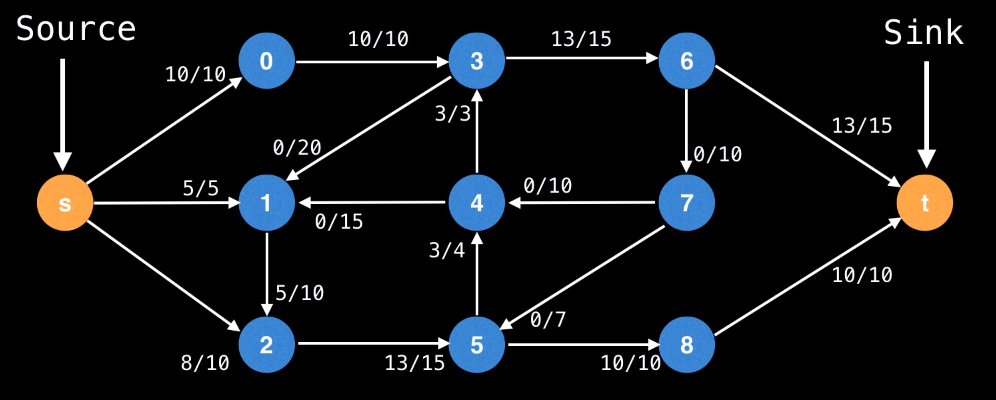

In [28]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = undirected_weighted_graph_matrix(E)

print(edmonds_karp(G, s, t))

25


### Implementacja #2
##### (Dla listowej reprezentacji grafu)

In [29]:
from queue import Queue


def bfs(G, s, t, parents, visited, token):
    n = len(G)
    q = Queue()
    q.put(s)
    visited[s] = token
    
    while not q.empty():
        u = q.get()
        for v in range(n):
            if not G[u][v] or visited[v] == token: continue
            q.put(v)
            visited[v] = token
            parents[v] = u
    
    return visited[t] == token


def get_bottleneck(G, s, t, parents):
    bottleneck = float('inf')
    u = t
    while u != s:
        bottleneck = min(bottleneck, G[parents[u]][u])
        u = parents[u]
    return bottleneck


def update_flow(G, s, t, parents, bottleneck):
    v = t
    while v != s:
        u = parents[v]
        G[u][v] -= bottleneck
        G[v][u] += bottleneck
        v = parents[v]

        
def create_residual_graph(G):
    n = len(G)
    G2 = [[0] * n for _ in range(n)]
    for u in range(n):
        for v, capacity in G[u]:
            G2[u][v] = capacity
    return G2
    

def edmonds_karp(G: 'graph represented by adjacency lists', s: 'source vertex', t: 'target vertex'):
    n = len(G)
    RG = create_residual_graph(G)  # We won't modify the input graph
    max_flow = 0
    parents = [-1] * n
    visited = [0] * n
    token = 1
    
    while bfs(RG, s, t, parents, visited, token):
        # Find an augmenting path and its bottleneck value
        bottleneck = get_bottleneck(RG, s, t, parents)
        # Update flow on a path which was found
        update_flow(RG, s, t, parents, bottleneck)
        # Increase a value of the maximum flow
        max_flow += bottleneck
        token += 1
            
    return max_flow #, RG

###### Kilka testów

###### UWAGA:
Wykorzystałem tę samą ilustrację grafu, ale w testach niżej graf jest nieskierowany.
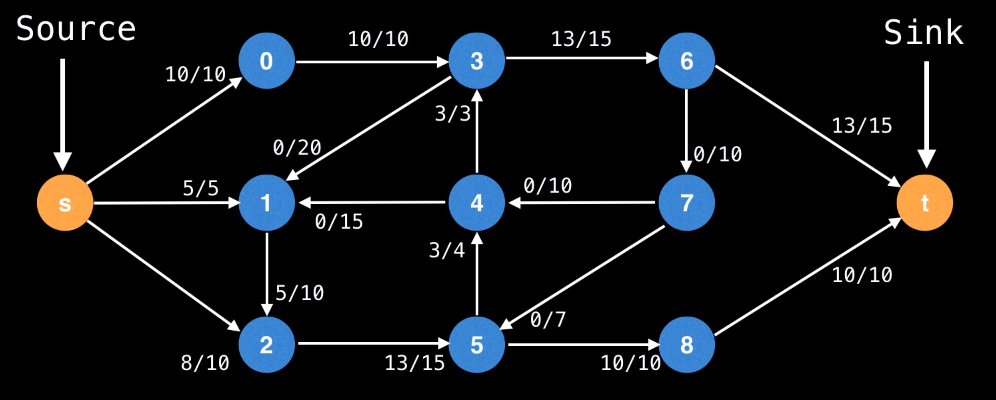

In [30]:
E = [(0, 3, 10), (3, 1, 20), (3, 6, 15), (1, 2, 10), (2, 5, 15), (4, 3, 3), (4, 1, 15), (5, 4, 4),
     (5, 8, 10), (7, 5, 7), (7, 4, 10), (6, 7, 10), (9, 0, 10), (9, 1, 5), (9, 2, 10), (6, 10, 15),
     (8, 10, 10)]
# Niech s = 9. a t = 10
s = 9
t = 10

G = undirected_weighted_graph_lists(E)

print(edmonds_karp(G, s, t))

25
